In [77]:
import pandas as pd

output_path = './Salary_Data.csv'

path = output_path
df = pd.read_csv(output_path)

# y = w*x + b
x = df["YearsExperience"]
y = df["Salary"]
df.head(5)

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2


In [78]:
w = 10
b = 0
y_pred = w*x + b
# cost =(y[2]-y_pred[2])**2
# print(cost)
cost = (y - y_pred)**2
cost.sum() / len(x)


602.547878787879

In [79]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost

In [80]:
compute_cost(x, y, 10, 0)

602.547878787879

In [81]:
# b=0 w=-100~100 cost會是多少

costs = [] #create a column(list)

for w in range(-100, 101):
    cost = compute_cost(x, y, w, 0)
    costs.append(cost)
costs    
# for w in range(-100, 101):
#   cost = compute_cost(x, y, w, 0)
#   costs.append(cost)
# costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

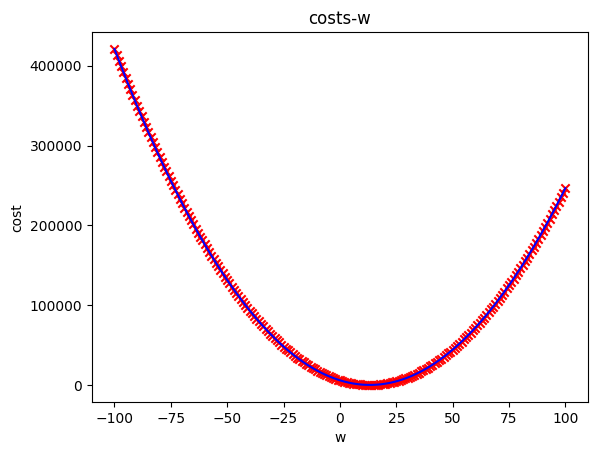

In [24]:
def plot_scatter(x, y):
  import matplotlib.pyplot as plt
  plt.plot(x, y, color="blue")
  plt.scatter(x, y, marker="x", color="red")
  plt.title("costs-w")
  plt.xlabel("w")
  plt.ylabel("cost")
  # plt.xlim([-100, 101])
  # plt.ylim([-60, 140])
  # plt.legend()
  plt.show()

# xl = np.
plot_scatter(range(-100, 101), costs)


In [32]:
j=0

for w in range(0,10):
  j+=1
  print(j)
 

1
2
3
4
5
6
7
8
9
10


In [39]:
# w=-100~100 b=-100~100 的 cost
import time

start_time = time.time()  # Start timing

ws = range(-100,100)
bs = range(-100, 101)
costs = np.zeros((201, 201))

i=0
for w in ws:
  j=0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs [i,j] =cost    
    j = j+1
  i = i+1
costs
end_time = time.time()  # End timing
print(f"Loop took {end_time - start_time} seconds to complete.")


Loop took 9.404739141464233 seconds to complete.


In [42]:
# w=-100~100 b=-100~100 的 cost
import time
import numpy as np # numpy vs pandas
# NumPy 的快速向量化計算。在大量數據或需要使用 NumPy 函數進行計算的場景中，使用 np.arange 可能會有性能上的優勢。

start_time = time.time()  # Start timing
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j += 1
  i += 1

costs
end_time = time.time()  # End timing

print(f"Loop took {end_time - start_time} seconds to complete.")


Loop took 10.705121994018555 seconds to complete.


In [69]:

dd = pd.DataFrame([ws, bs, costs]).T  # .T 是轉置，使得每個列表成為一列而非一行
dd.columns = ["ws", "bs", "cost"]
dd

,ws,bs,cost
0,-100,-100,"[543097.7478787878, 541777.2812121212, 540458...."
1,-99,-99,"[534727.5093939394, 533416.8063636364, 532108...."
2,-98,-98,"[526422.8218181819, 525121.8824242424, 523822...."
3,-97,-97,"[518183.6851515151, 516892.50939393934, 515603..."
4,-96,-96,"[510010.0993939394, 508728.68727272726, 507449..."
...,...,...,...
196,96,96,"[155208.8775757576, 155802.08363636362, 156397..."
197,97,97,"[159686.6172727273, 160289.58696969697, 160894..."
198,98,98,"[164229.90787878787, 164842.6412121212, 165457..."
199,99,99,"[168838.7493939394, 169461.24636363637, 170085..."


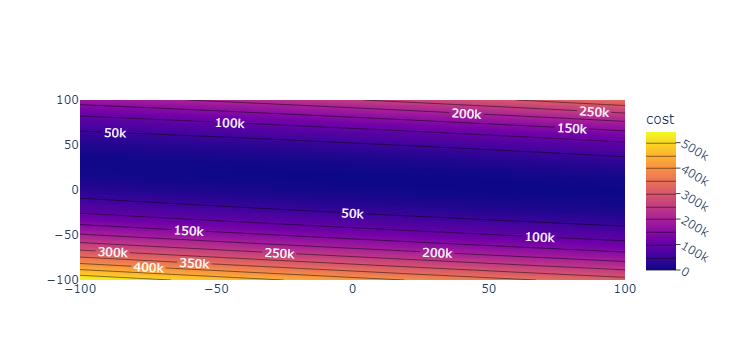

In [70]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        # z=costs,
        # x=ws, # horizontal axis
        # y=bs, # vertical axis
        z=dd["cost"],
        x=dd["ws"], # horizontal axis
        y=dd["bs"], # vertical axis
        
        contours=dict(
            coloring ='heatmap',
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 12,
                color = 'white',
        )),
        colorbar=dict(nticks=10, ticks='outside',
                      ticklen=5, tickwidth=1,
                      title='cost', # title here
                      showticklabels=True,
                      tickangle=30, tickfont_size=12)
        
    ))
fig.show()


32.6948484848485


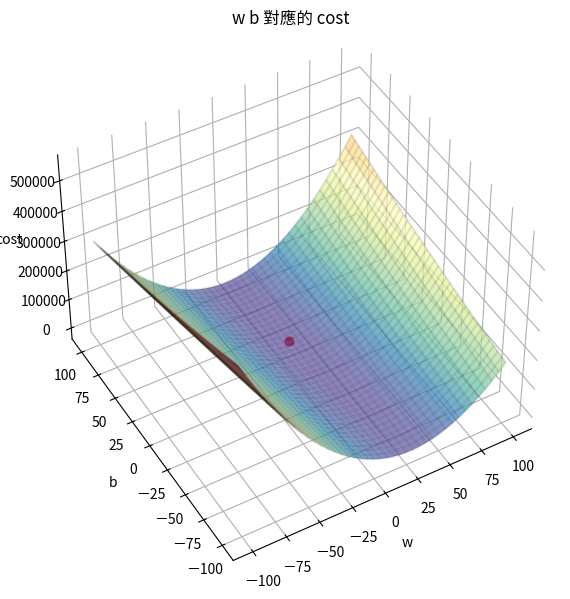

當w=[9], b=[29] 會有最小cost:[32.69484848]


In [75]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.view_init(45, -120)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))

b_grid, w_grid = np.meshgrid(bs, ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7)   #alpha 透明度
ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1)

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

# find the minima cost and mark it on the contour.
print(np.min(costs))

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)

plt.show()

print(f"當w={ws[w_index]}, b={bs[b_index]} 會有最小cost:{costs[w_index, b_index]}")